<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.1893
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.1034
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0967
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0931
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.0911
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


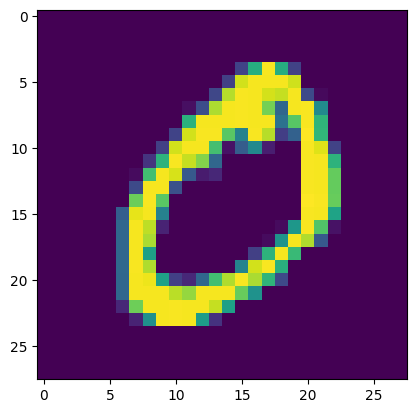

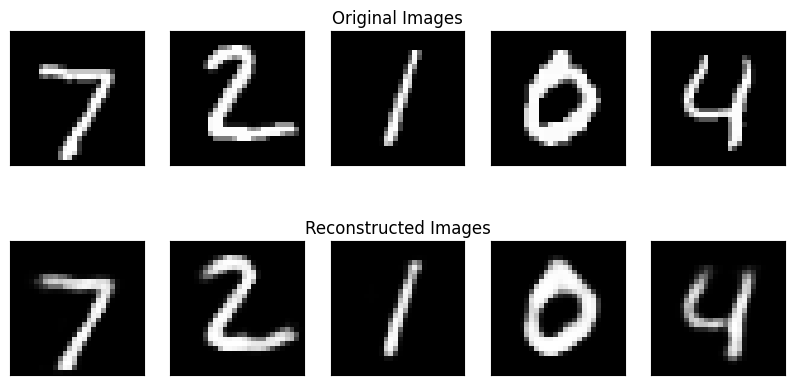

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 0.2074
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.1305
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.1206
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - loss: 0.1155
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.1132


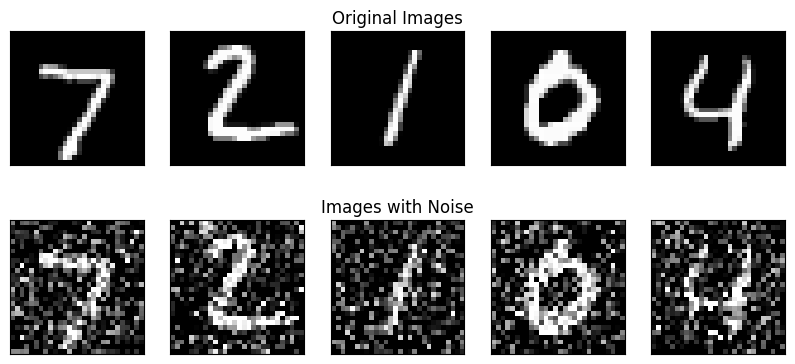

In [8]:
# 출처 : https://benban.tistory.com/79


# 시각화를 위한 matplotlib 호출
# 연산을 위한 numpy 호출
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Import the MNIST dataset from keras.datasets
from tensorflow.keras.datasets import mnist

# autoencoder 결과물 플롯 함수
def plot_autoencoder_outputs(autoencoder, x, n, dims):
    """

    :param autoencoder: 학습된 autoencoder 모델
    :param x: image를 그려볼 데이터
    :param n: 몇 개의 image를 그릴것인지 n을 통해 전달
    :param dims: 이미지 plot을 위해 1차원 배열을 2차원으로 바꿔주어야 함
    :return:
    """
    decoded_imgs = autoencoder.predict(x)

    plt.figure(figsize=(10, 5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        # ax.set_title('Original Images')
        if i == n // 2:
            ax.set_title('Original Images')

        # plot reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        # ax.set_title('Reconstructed Images')
        if i == n // 2:
            ax.set_title('Reconstructed Images')

    plt.show()

# 내장 데이터셋 호출을 위한 함수 호출
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터 차원 확인
print(X_train.shape) # (60000, 28, 28)
print(y_train.shape) # (60000, )
print(X_test.shape) # (10000, 28, 28)
print(y_test.shape) # (10000, )

plt.imshow(X_train[1])

"""
Autoencoder는 기본적으로 Dense Layer를 활용합니다.
해당 레이어를 활용하기 위해서 2차원 데이터를 1차원 데이터인 배열로 바꿔주어야 합니다.
Tensorflow를 활용하면 Flatten을 통해서 펼쳐줄 수 있지만, 여기서는 numpy 를 통해 reshape을 진행하고,
데이터를 float 형태로 바꿔주겠습니다.
"""

# 데이터 형태 및 유형 변경
X_train = X_train.reshape(-1, 28 * 28).astype(np.float32) / 255.0
X_test = X_test.reshape(-1, 28 * 28).astype(np.float32) / 255.0

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# dimension 설정
input_dim = X_train.shape[-1]
hidden_dim = 128
code_dim = 32

# 함수형 API 활용
input_img = Input(shape=(input_dim, ))
hidden_1 = Dense(hidden_dim, activation='relu')(input_img)
code = Dense(code_dim, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_dim, activation='relu')(code)
output_img = Dense(input_dim, activation='sigmoid')(hidden_2)

# input과 output을 모델로 전달
autoencoder = Model(inputs=input_img, outputs=output_img)


# 모델 compile
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 모델 학습 진행
autoencoder.fit(X_train, X_train, epochs=5)

plot_autoencoder_outputs(autoencoder, X_test, 5, (28, 28))

# 다음은 디노이징 오토인코더에 대해서 코드 구현해보겠습니다.
# 원본 데이터에 노이즈 추가
noise_factor = 0.4
X_train_w_noise = X_train + noise_factor * np.random.normal(size=X_train.shape)
X_test_w_noise = X_test + noise_factor * np.random.normal(size=X_test.shape)

# clip 함수를 통해 min, max 값을 넘어서는 값은 min과 max로 치환
X_train_w_noise = np.clip(X_train_w_noise, 0.0, 1.0)
X_test_w_noise = np.clip(X_test_w_noise, 0.0, 1.0)


# 노이즈 인풋과 원본 인풋 확인
n = 5

plt.figure(figsize=(10, 4.5))
for i in range(n):
    # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Original Images')

    # plot image with noise
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_w_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Images with Noise')

"""
위처럼 원본 데이터에 노이즈가 제대로 추가된 것을 확인할 수 있습니다.
이젠 오토인코더를 구현하여 노이즈를 제거한 상태로 이미지를 재구성해보겠습니다.
"""

input_img = Input(shape=(input_dim, ))
hidden_1 = Dense(hidden_dim, activation='relu')(input_img)
code = Dense(code_dim, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_dim, activation='relu')(code)
output_img = Dense(input_dim, activation='sigmoid')(hidden_2)

autoencoder = Model(inputs=input_img, outputs=output_img)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(X_train_w_noise, X_train, epochs=5)  # 입력은 노이즈, 출력은 원본

n = 5
plt.figure(figsize=(10, 7))

images = autoencoder.predict(X_test_w_noise)

for i in range(n):
    # plot original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Original Images')

    # plot noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(X_test_w_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Noisy Input')

    # plot noisy image
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Autoencoder Output')


